# MSCS 634 – Lab 2
## K-Nearest Neighbors and Radius Neighbors Classification
**Name:** Prashanna Acharya <br>
**Course:** MSCS 634  <br>
**Instructor:** Dr. Satish Penmatsa <br> 
**Date:** Feb 14 2026 <br>


**Step 1: Loading and Prepping the Dataset**

Here, I am importing the required libraries for data handling, model implementation, and performance evaluation.

In [1]:
## 1.  Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score


Here, I am loading the Wine dataset and separating the features (X) and target labels (y). The dataset contains 178 samples with 13 features and 3 wine classes.

In [2]:
## 2. Loading Dataset 

wine = load_wine()

## Extracting features and target labels

X = wine.data
y = wine.target

print("Feature Names:", wine.feature_names)
print("Target Classes:", wine.target_names)
print("Dataset Shape:", X.shape)


Feature Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target Classes: ['class_0' 'class_1' 'class_2']
Dataset Shape: (178, 13)


Here, I am converting the dataset into a DataFrame to inspect feature values and class distribution. I am confirming that the dataset is reasonably balanced across the three classes.

In [3]:
## 3. Exploring Basic Data

# Converting to DataFrame for easier viewing

df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
## 4. Checking Class Distribution 

print(df['target'].value_counts())


target
1    71
0    59
2    48
Name: count, dtype: int64


Here, I am splitting the dataset into training and testing sets. The training data is being used to train the model, while the testing data is being used to evaluate performance.

In [5]:
## 5. Train- Test Split (80/20)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)


Training size: (142, 13)
Testing size: (36, 13)


**Step 2: Implementing KNN**

Here, I am testing different k values to observe how the number of neighbors affects accuracy. I am training the model for each k and recording the test accuracy.

In [6]:
k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    knn_accuracies.append(acc)
    print(f"k = {k}, Accuracy = {acc:.4f}")


k = 1, Accuracy = 0.7778
k = 5, Accuracy = 0.7222
k = 11, Accuracy = 0.7500
k = 15, Accuracy = 0.7500
k = 21, Accuracy = 0.7778


**Step 3: Implementing Radius Neighbors (RNN)**

I am testing different radius values (350, 400, 450, 500, 550) to analyze how distance thresholds influence classification performance. I am also recording the accuracy for comparison.

In [7]:
radius_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []

for r in radius_values:
    rnn = RadiusNeighborsClassifier(radius=r, outlier_label=0)
    rnn.fit(X_train, y_train)
    
    y_pred = rnn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    rnn_accuracies.append(acc)
    print(f"Radius = {r}, Accuracy = {acc:.4f}")


Radius = 350, Accuracy = 0.7500
Radius = 400, Accuracy = 0.7222
Radius = 450, Accuracy = 0.7222
Radius = 500, Accuracy = 0.7222
Radius = 550, Accuracy = 0.7222
Radius = 600, Accuracy = 0.7222


**Step 4: Visualization**

I am plotting k values against accuracy to identify the optimal number of neighbors.

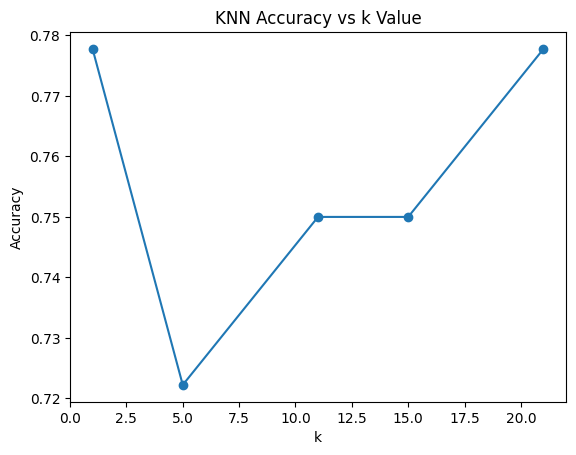

In [8]:
## Plotting KNN Accuracy Trend 

plt.figure()
plt.plot(k_values, knn_accuracies, marker='o')
plt.title("KNN Accuracy vs k Value")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()


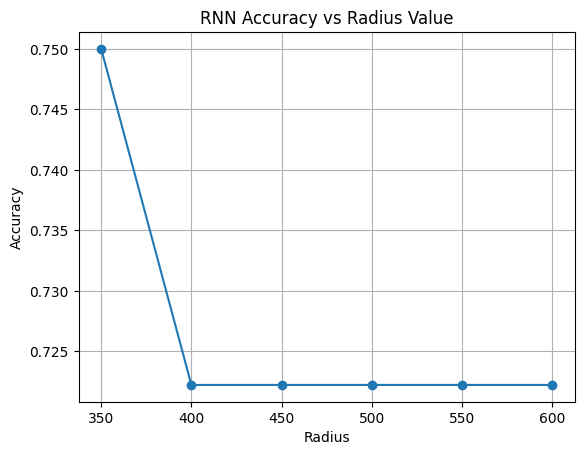

In [9]:
## Plotting RNN Accuracy Trend

plt.figure()
plt.plot(radius_values, rnn_accuracies, marker='o')
plt.title("RNN Accuracy vs Radius Value")
plt.xlabel("Radius")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


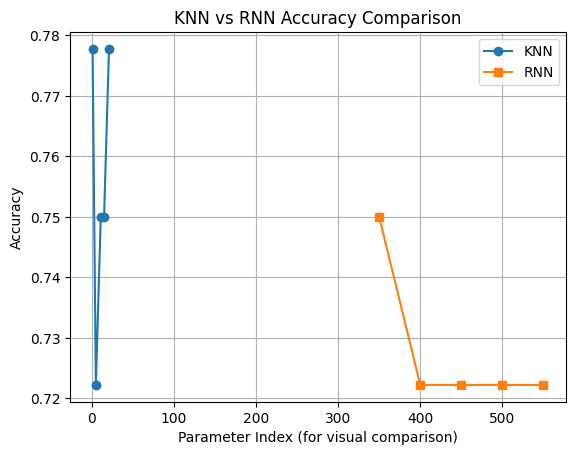

In [10]:
## Comparing Both Models 

plt.figure()
plt.plot(k_values, knn_accuracies, marker='o', label='KNN')
plt.plot(radius_values[:len(knn_accuracies)], rnn_accuracies[:len(knn_accuracies)], marker='s', label='RNN')

plt.title("KNN vs RNN Accuracy Comparison")
plt.xlabel("Parameter Index (for visual comparison)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


## Analysis

**Observation and Comparisons**

- KNN accuracy varies depending on the choice of k.
- Smaller k (like 1) may overfit and produce unstable results.
- Moderate values (like 5 or 11) often give better generalization.
- Larger k smooths decision boundaries but may reduce sensitivity.
- RNN accuracy depends on the radius size.
- Smaller radius values may fail to find enough neighbors.
- Larger radius values include more points and may reduce model precision.

**Conclusion**

K-Nearest Neighbors (KNN) is ideal for scenarios requiring a constant number of neighbors to drive predictions. Conversely, Radius Neighbors (RNN) excels when data density is inconsistent across the feature space. For specific datasets like 'Wine,' KNN typically offers greater stability.